In [1]:
import os
import cv2
import numpy as np
import pandas as pd
import string
from PIL import Image

import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

import tensorflow as tf
from tensorflow.keras.utils import pad_sequences, to_categorical
from tensorflow.keras.layers import (
    Input, Dense, LSTM, Conv2D, MaxPool2D, BatchNormalization, 
    Bidirectional, Activation, Reshape, Lambda
)
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.activations import relu, sigmoid, softmax
import keras.backend as K

from datasets import load_dataset  # Để tải bộ dữ liệu từ Hugging Face Datasets


In [2]:
from tensorflow.keras import layers
from tensorflow.keras import Model
from tensorflow.keras import backend as tf_keras_backend
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D , Flatten

tf_keras_backend.set_image_data_format('channels_last')
tf_keras_backend.image_data_format()

'channels_last'

In [3]:
# Phương pháp 1: Load char_list từ file JSON
import json
json_path = "F:/new data/char_list.json"
with open(json_path, 'r') as f:
    char_list = json.load(f)
print("Số lượng ký tự trong char_list sau khi cập nhật:", len(char_list))
print("Danh sách ký tự trong char_list (JSON):", "".join(char_list))


Số lượng ký tự trong char_list sau khi cập nhật: 243
Danh sách ký tự trong char_list (JSON): !"#&'()*+,-./0123456789:;?ABCDEFGHIJKLMNOPQRSTUVWXYZabcdefghijklmnopqrstuvwxyzÀÁÂÃÈÉÊÌÍÒÓÔÕÙÚÝĂĐĨŨƠàáâãèéêìíòóôõùúýăđĩũơĂẮẰẲẴẶÂẤẦẨẪẬÊẾỀỂỄỆÔỐỒỔỖỘƠỚỜỞỠỢƯỨỪỬỮỰàáâãèéêìíòóôõùúýăđĩũơăắằẳẵặâấầẩẫậêếềểễệôốồổỗộơớờởỡợưứừửữựẹỌạảủỎỤỊỉỦịỏẢụọẻẠẸỈẺẽỲỵẼỴỳỶỷỹỸ


In [4]:
import numpy as np

# Đường dẫn đến các file đã lưu
train_images_path = "train_images_combined.npy"
train_labels_path = "train_labels_combined.npy"
valid_images_path = "valid_images_combined.npy"
valid_labels_path = "valid_labels_combined.npy"

# Load dữ liệu từ các file .npy
train_images = np.load(train_images_path)
train_labels = np.load(train_labels_path)
valid_images = np.load(valid_images_path)
valid_labels = np.load(valid_labels_path)

# Kiểm tra lại dữ liệu đã load
print(f"Loaded train images shape: {train_images.shape}")
print(f"Loaded train labels shape: {train_labels.shape}")
print(f"Loaded valid images shape: {valid_images.shape}")
print(f"Loaded valid labels shape: {valid_labels.shape}")


Loaded train images shape: (110842, 32, 128, 1)
Loaded train labels shape: (110842, 17)
Loaded valid images shape: (12304, 32, 128, 1)
Loaded valid labels shape: (12304, 17)


In [5]:
from tensorflow.keras import layers
from tensorflow.keras import Model
from tensorflow.keras import backend as tf_keras_backend
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D , Flatten

tf_keras_backend.set_image_data_format('channels_last')
tf_keras_backend.image_data_format()
from tensorflow.keras.layers import Conv2D, BatchNormalization, MaxPool2D, LSTM, Bidirectional, Dense, Input, Reshape, Dropout, Concatenate
from tensorflow.keras.models import Model
import tensorflow.keras.backend as K
from keras.layers import SpatialDropout2D

def Model1():
    inputs = Input(shape=(32, 128, 1))  

    # Lớp CNN đầu tiên
    conv_1 = Conv2D(128, (5, 5), activation='relu', padding='same')(inputs)  
    batch_norm_1 = BatchNormalization()(conv_1)
    pool_1 = MaxPool2D(pool_size=(2, 2), strides=2)(batch_norm_1)
    dropout_1 = SpatialDropout2D(0.2)(pool_1)  

    # Lớp CNN thứ hai
    conv_2a = Conv2D(256, (3, 3), activation='relu', padding='same')(dropout_1)  
    conv_2b = Conv2D(256, (5, 5), activation='relu', padding='same')(dropout_1)  
    concat_2 = Concatenate()([conv_2a, conv_2b])
    batch_norm_2 = BatchNormalization()(concat_2)
    pool_2 = MaxPool2D(pool_size=(2, 2), strides=2)(batch_norm_2)
    dropout_2 = SpatialDropout2D(0.2)(pool_2)  #

    # Lớp CNN thứ ba và thứ tư
    conv_3a = Conv2D(512, (3, 3), activation='relu', padding='same')(dropout_2) 
    conv_3b = Conv2D(512, (5, 5), activation='relu', padding='same')(dropout_2)  
    concat_3 = Concatenate()([conv_3a, conv_3b])
    batch_norm_3 = BatchNormalization()(concat_3)

    conv_4 = Conv2D(512, (3, 3), activation='relu', padding='same')(batch_norm_3)
    batch_norm_4 = BatchNormalization()(conv_4)
    pool_4 = MaxPool2D(pool_size=(2, 1))(batch_norm_4)
    dropout_4 = SpatialDropout2D(0.2)(pool_4)  

    # Lớp CNN thứ năm và thứ sáu
    conv_5a = Conv2D(1024, (3, 3), activation='relu', padding='same')(dropout_4)  
    conv_5b = Conv2D(1024, (5, 5), activation='relu', padding='same')(dropout_4)  
    concat_5 = Concatenate()([conv_5a, conv_5b])
    batch_norm_5 = BatchNormalization()(concat_5)

    conv_6 = Conv2D(1024, (3, 3), activation='relu', padding='same')(batch_norm_5)
    batch_norm_6 = BatchNormalization()(conv_6)
    pool_6 = MaxPool2D(pool_size=(2, 1))(batch_norm_6)
    dropout_6 = SpatialDropout2D(0.3)(pool_6)  

    # Lớp CNN cuối cùng
    conv_7 = Conv2D(2048, (2, 2), activation='relu')(dropout_6)  
    batch_norm_7 = BatchNormalization()(conv_7)

     # Định hình lại đầu ra CNN
    reshaped = Reshape((31, 2048))(batch_norm_7)  
    # Lớp LSTM
    blstm_1 = Bidirectional(LSTM(512, return_sequences=True, dropout=0.2))(reshaped)  
    blstm_2 = Bidirectional(LSTM(512, return_sequences=True, dropout=0.3))(blstm_1)  
    blstm_3 = Bidirectional(LSTM(512, return_sequences=True, dropout=0.4))(blstm_2)  

    # Lớp Dense
    dense = Dense(1024, activation='relu')(blstm_3)  
    batch_norm_dense = BatchNormalization()(dense)
    dense_dropout = Dropout(0.4)(batch_norm_dense)  
    outputs = Dense(len(char_list) + 1, activation='softmax')(dense_dropout)

    act_model = Model(inputs, outputs)
    
    return act_model, outputs, inputs


In [6]:
act_model,outputs,inputs=Model1()
act_model.save('my_model.h5')
act_model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 32, 128, 1)  0           []                               
                                ]                                                                 
                                                                                                  
 conv2d (Conv2D)                (None, 32, 128, 128  3328        ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 32, 128, 128  512        ['conv2d[0][0]']                 
 alization)                     )                                                             

In [7]:
# load CRNN Model
filepath='F:/new data/hdf5s/Adamo-30000r-150e-110842t-12304v.hdf5'
act_model.load_weights(filepath)

# predict outputs on validation images
prediction = act_model.predict(valid_images)
 
# use CTC decoder
decoded = K.ctc_decode(prediction, 
                       input_length=np.ones(prediction.shape[0]) * prediction.shape[1],
                       greedy=True)[0][0]
out = K.get_value(decoded)


385/385 [==============================] - 37s 71ms/step


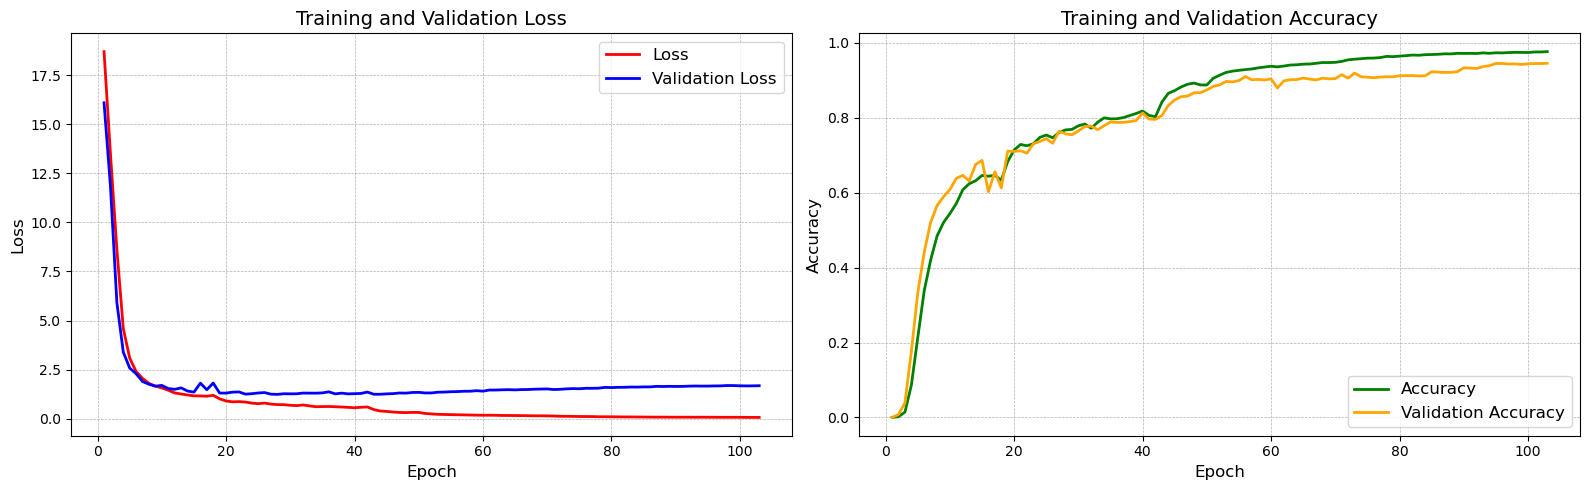

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# Đọc dữ liệu từ file Excel
def read_data_from_excel(file_path):
    df = pd.read_excel(file_path, engine='openpyxl')
    return df

# Hàm vẽ đồ thị Loss
def plot_loss_graph(ax, df):
    ax.plot(df['Epoch'], df['Loss'], label='Loss', color='red', linestyle='-', linewidth=2)
    ax.plot(df['Epoch'], df['Val_Loss'], label='Validation Loss', color='blue', linestyle='-', linewidth=2)
    
    # Thiết lập tiêu đề và nhãn trục
    ax.set_title('Training and Validation Loss', fontsize=14)
    ax.set_xlabel('Epoch', fontsize=12)
    ax.set_ylabel('Loss', fontsize=12)
    
    # Thêm legend và grid
    ax.legend(loc='upper right', fontsize=12)
    ax.grid(True, which='both', linestyle='--', linewidth=0.5)

# Hàm vẽ đồ thị Accuracy
def plot_accuracy_graph(ax, df):
    ax.plot(df['Epoch'], df['Accuracy'], label='Accuracy', color='green', linestyle='-', linewidth=2)
    ax.plot(df['Epoch'], df['Val_Accuracy'], label='Validation Accuracy', color='orange', linestyle='-', linewidth=2)
    
    # Thiết lập tiêu đề và nhãn trục
    ax.set_title('Training and Validation Accuracy', fontsize=14)
    ax.set_xlabel('Epoch', fontsize=12)
    ax.set_ylabel('Accuracy', fontsize=12)
    
    # Thêm legend và grid
    ax.legend(loc='lower right', fontsize=12)
    ax.grid(True, which='both', linestyle='--', linewidth=0.5)

# Đọc dữ liệu từ file Excel
file_path = "F:/epoch_results.xlsx"  
df = read_data_from_excel(file_path)
fig, axs = plt.subplots(1, 2, figsize=(16, 5))  

plot_loss_graph(axs[0], df)
plot_accuracy_graph(axs[1], df)
plt.tight_layout()
plt.show()


In [19]:
# Hàm tính điểm F1 Score
from sklearn.metrics import precision_score, recall_score, f1_score

def calculate_f1_score(predictions, ground_truth):
    """
    Calculate the F1 score for the predicted and ground truth sequences.

    Args:
        predictions (list of str): Decoded predictions from the model.
        ground_truth (list of str): Ground truth labels for the validation set.

    Returns:
        dict: A dictionary containing precision, recall, and F1 score.
    """
    # Ensure predictions and ground truth lengths match
    assert len(predictions) == len(ground_truth), "Predictions and ground truth must have the same length"

    # Flatten character-level sequences for evaluation
    all_predicted_chars = [char for seq in predictions for char in seq]
    all_ground_truth_chars = [char for seq in ground_truth for char in seq]

    # Ensure both lists have the same length
    min_length = min(len(all_predicted_chars), len(all_ground_truth_chars))
    all_predicted_chars = all_predicted_chars[:min_length]
    all_ground_truth_chars = all_ground_truth_chars[:min_length]

    # Calculate precision, recall, and F1 score
    precision = precision_score(all_ground_truth_chars, all_predicted_chars, average='weighted')
    recall = recall_score(all_ground_truth_chars, all_predicted_chars, average='weighted')
    f1 = f1_score(all_ground_truth_chars, all_predicted_chars, average='weighted')

    return {
        'precision': precision,
        'recall': recall,
        'f1_score': f1
    }

# Tính F1 Score
decoded_predictions = ["decoded_text1", "decoded_text2"]  # Replace with your decoded predictions
ground_truth_labels = ["ground_truth1", "ground_truth2"]  # Replace with your actual labels

metrics = calculate_f1_score(decoded_predictions, ground_truth_labels)
print("Precision:", metrics['precision'])
print("Recall:", metrics['recall'])
print("F1 Score:", metrics['f1_score'])


Precision: 0.07692307692307693
Recall: 0.07692307692307693
F1 Score: 0.07692307692307693


c:\Users\phong\miniconda3\envs\tf\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\phong\miniconda3\envs\tf\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


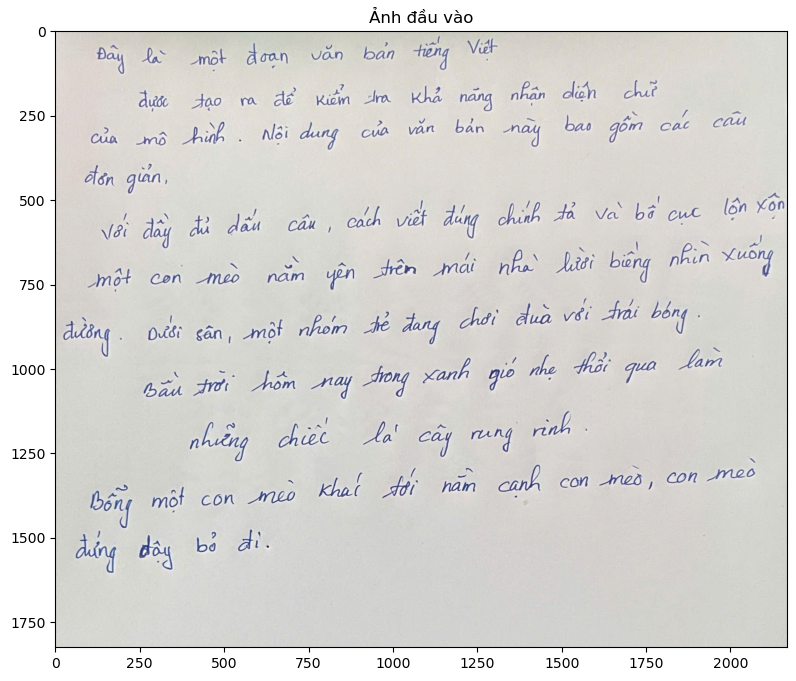

In [85]:
# %% [markdown]
# ### Bước 1: Gắn đường dẫn ảnh đầu vào và hiển thị ảnh
import cv2
import numpy as np
import matplotlib.pyplot as plt
image_path = 'F:/AI/CRNN VN/aaaaa.png' 
# image_path = 'F:/AI/CRNN VN/viet-tay-4-1342522969.jpg'  
# image_path = 'F:/AI/final/a02-008_handwritten_text.png'  
# image_path = 'F:/AI/vn_handwritten_images/data/0106_samples.png'  
image = cv2.imread(image_path)

# Cắt ảnh để tập trung vào khu vực chứa chữ (giúp giảm nhiễu từ các vùng không liên quan)
image = image[00:2250, 
              00:3400]

plt.figure(figsize=(12, 8))
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Ảnh đầu vào')
plt.show()

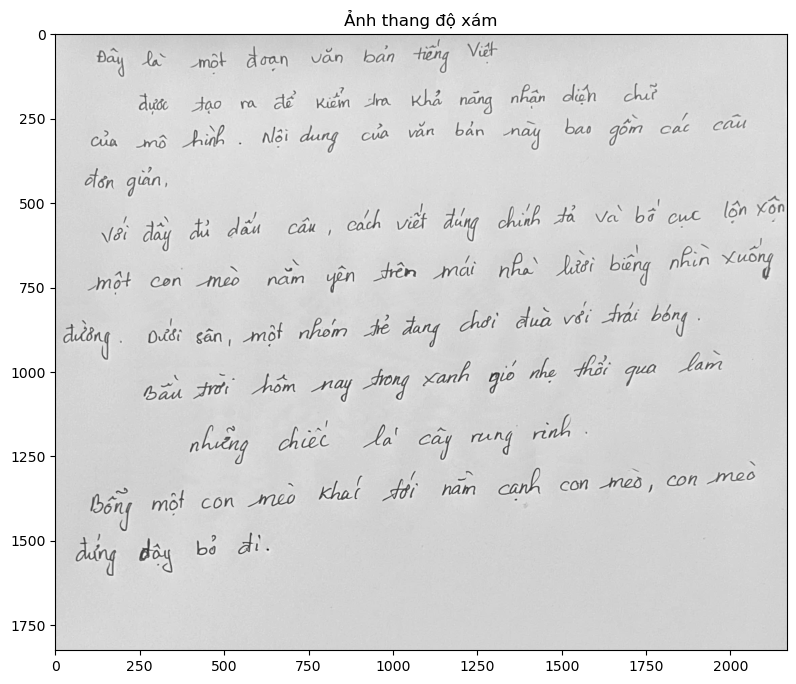

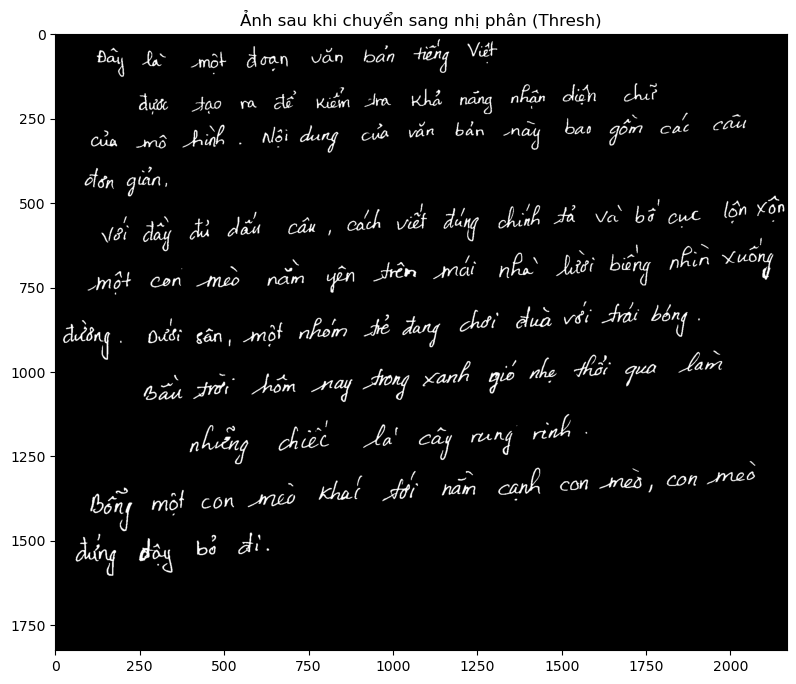

In [86]:
# %% [markdown]
# ### Bước 2: Chuyển ảnh sang thang độ xám
if len(image.shape) == 3:
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
else:
    gray = image

plt.figure(figsize=(12, 8))
plt.imshow(gray, cmap='gray')
plt.title('Ảnh thang độ xám')
plt.show()
_, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

plt.figure(figsize=(12, 8))
plt.imshow(thresh, cmap='gray')
plt.title('Ảnh sau khi chuyển sang nhị phân (Thresh)')
plt.show()


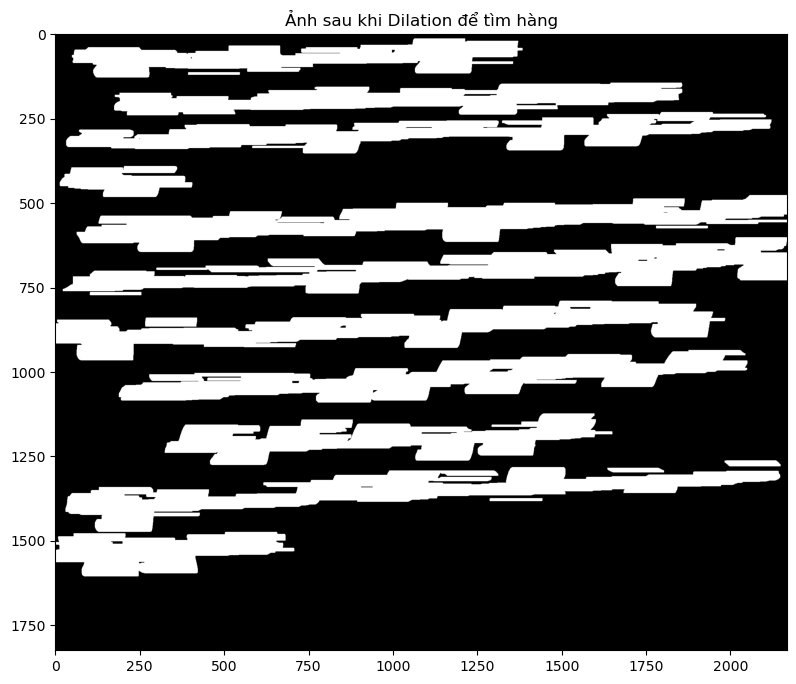

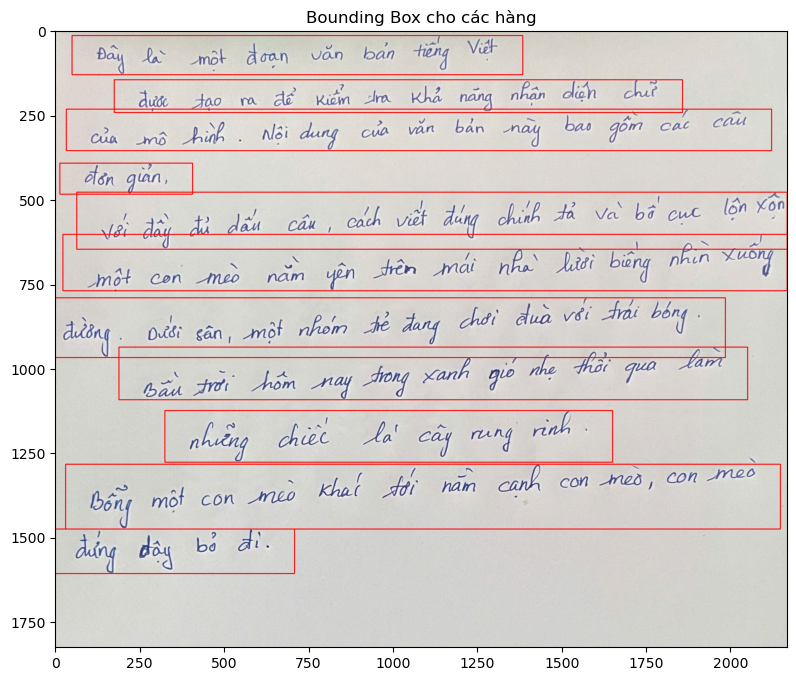

In [87]:

# %% [markdown]
# ### Bước 4: Tạo Bounding Box cho các hàng
# Dilation để làm nổi bật vùng chứa hàng
blurred = cv2.GaussianBlur(gray, (5, 5), 0)

kernel = np.ones((5, 150), np.uint8)  # Tăng kích thước kernel để gộp các hàng lại với nhau  # Giảm kích thước kernel để tránh việc tách các dấu nhỏ thành hàng riêng
img_dilation = cv2.dilate(thresh, kernel, iterations=1)
plt.figure(figsize=(12, 8))
plt.imshow(img_dilation, cmap='gray')
plt.title('Ảnh sau khi Dilation để tìm hàng')
plt.show()

# Tìm các contours để phát hiện các hàng
contours, _ = cv2.findContours(img_dilation, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
rows = []
for ctr in contours:
    x, y, w, h = cv2.boundingRect(ctr)
    if h > 30:  # Tăng giá trị chiều cao để loại bỏ các contour nhiễu
        row = gray[y:y + h, x:x + w]
        rows.append((x, y, w, h, row))

# Sắp xếp các hàng theo thứ tự từ trên xuống
rows = sorted(rows, key=lambda r: r[1])

# Ghép các contour nhỏ (ví dụ: dấu ngoặc kép) với hàng gần nhất
merged_rows = []
for i in range(len(rows)):
    if i > 0 and rows[i][3] < 20:  # Nếu chiều cao của contour nhỏ (ví dụ: dấu ngoặc kép)
        # Ghép vào hàng trước đó
        prev_x, prev_y, prev_w, prev_h, prev_row = merged_rows[-1]
        new_x = min(prev_x, rows[i][0])
        new_y = min(prev_y, rows[i][1])
        new_w = max(prev_x + prev_w, rows[i][0] + rows[i][2]) - new_x
        new_h = max(prev_y + prev_h, rows[i][1] + rows[i][3]) - new_y
        new_row = gray[new_y:new_y + new_h, new_x:new_x + new_w]
        merged_rows[-1] = (new_x, new_y, new_w, new_h, new_row)
    else:
        merged_rows.append(rows[i])
rows = merged_rows

# Đảm bảo không có hàng bị trùng lặp hoặc thêm sai
rows = sorted(rows, key=lambda r: r[1])

# Sắp xếp các hàng theo thứ tự từ trên xuống
rows = sorted(rows, key=lambda r: r[1])

# Vẽ bounding box các hàng lên ảnh gốc
image_rows = image.copy()
for (x, y, w, h, _) in rows:
    cv2.rectangle(image_rows, (x, y), (x + w, y + h), (0, 0, 255), 2)  # Sử dụng màu đỏ để phân biệt

plt.figure(figsize=(12, 8))
plt.imshow(cv2.cvtColor(image_rows, cv2.COLOR_BGR2RGB))
plt.title('Bounding Box cho các hàng')
plt.show()


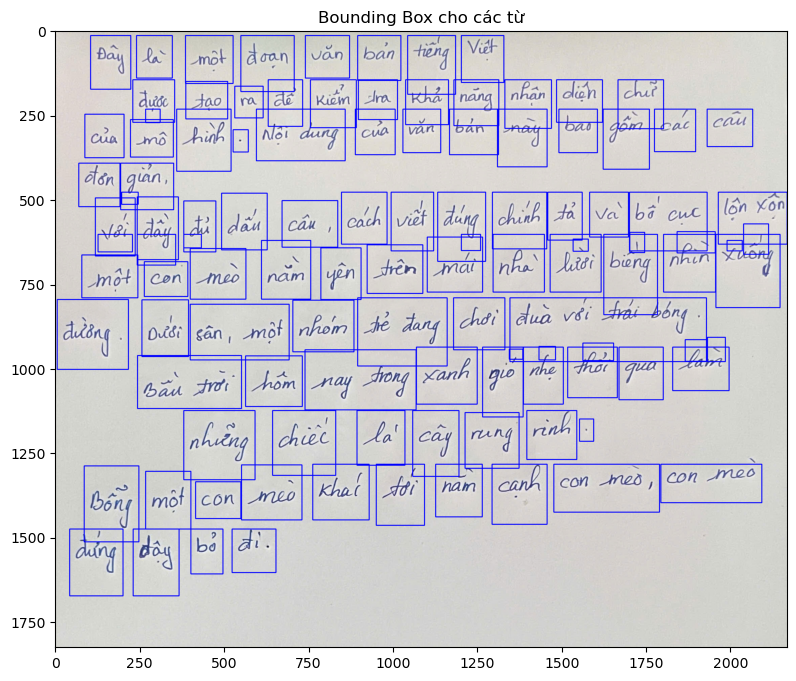

In [88]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Giả sử biến image là hình ảnh gốc và rows là danh sách các hàng văn bản đã được xác định trước đó
image_words = image.copy()
rows = sorted(rows, key=lambda r: r[1])  # Sắp xếp các hàng theo thứ tự từ trên xuống
words_in_rows = []

# Hệ số điều chỉnh chiều cao
height_scale = 1.5  # Có thể thay đổi tùy theo yêu cầu

for (x, y, w, h, row) in rows:
    # Tạo kernel để làm giãn các vùng chứa từ
    kernel_word = np.ones((40, 40), np.uint8)
    row_thresh = cv2.threshold(row, 127, 255, cv2.THRESH_BINARY_INV)[1]
    row_dilation = cv2.dilate(row_thresh, kernel_word, iterations=1)
    
    # Tìm các contours của từ
    word_contours, _ = cv2.findContours(row_dilation, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    word_contours = sorted(word_contours, key=lambda ctr: cv2.boundingRect(ctr)[0])  # Sắp xếp từ trái sang phải
    words = []
    for ctr in word_contours:
        wx, wy, ww, wh = cv2.boundingRect(ctr)
        
        # Kiểm tra ngưỡng kích thước để loại bỏ nhiễu
        if ww > 15 and wh > 15:
            # Tinh chỉnh chiều cao bounding box
            new_wh = int(wh * height_scale)
            wy_adjusted = max(0, wy - (new_wh - wh) // 2)  # Đảm bảo không vượt quá hình ảnh
            
            # Cắt từ dựa trên bounding box đã điều chỉnh
            word = row[wy_adjusted:wy_adjusted + new_wh, wx:wx + ww]
            words.append((x + wx, y + wy_adjusted, ww, new_wh, word))
            
            # Vẽ bounding box lên ảnh gốc
            cv2.rectangle(image_words, (x + wx, y + wy_adjusted), (x + wx + ww, y + wy_adjusted + new_wh), (255, 0, 0), 2)
    
    words_in_rows.append(words)

# Hiển thị hình ảnh với các bounding box
plt.figure(figsize=(12, 8))
plt.imshow(cv2.cvtColor(image_words, cv2.COLOR_BGR2RGB))
plt.title('Bounding Box cho các từ')
plt.show()


In [89]:

# Helper function to process image
def process_image(img):
    w, h = img.shape
    new_w = 32
    new_h = int(h * (new_w / w))
    img = cv2.resize(img, (new_h, new_w))
    w, h = img.shape

    if w < 32:
        add_zeros = np.full((32 - w, h), 255)
        img = np.concatenate((img, add_zeros))

    if h < 128:
        add_zeros = np.full((32, 128 - h), 255)
        img = np.concatenate((img, add_zeros), axis=1)

    img = cv2.resize(img, (128, 32))
    img = cv2.subtract(255, img)
    img = img.astype('float32') / 255

    return np.expand_dims(img, axis=2)

# Hàm encode_to_labels sửa lỗi
def encode_to_labels(txt):
    """Encodes each output word into digits based on char_list, dynamically updating it."""
    dig_lst = []
    global char_list  # Đảm bảo sử dụng char_list toàn cục
    for chara in txt:
        if chara not in char_list:
            char_list.append(chara)  # Thêm ký tự mới vào char_list
        dig_lst.append(char_list.index(chara))
    return dig_lst

1/1 [==============================] - 0s 50ms/step
Dòng dự đoán (hàng 1): Dây là một đoạn văn bản tiếng Việt


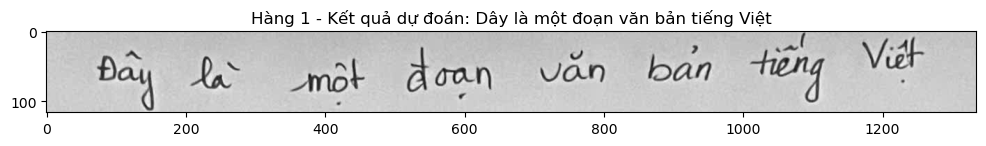

1/1 [==============================] - 0s 43ms/step
Dòng dự đoán (hàng 2): được tạo ra để Kiểm tra Khỏ năng nhận diện chữ


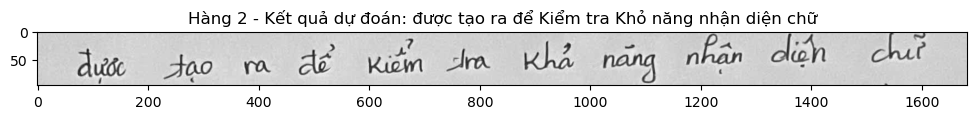

1/1 [==============================] - 0s 43ms/step
Dòng dự đoán (hàng 3): cưa mô "í hình : Nộr-dung cưa văn bản này bao gồm các câu


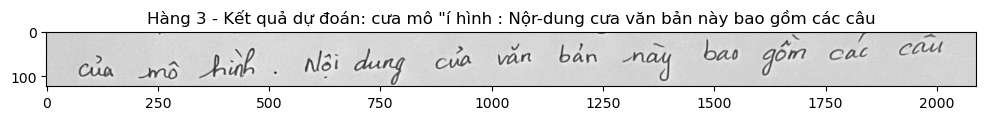

1/1 [==============================] - 0s 42ms/step
Dòng dự đoán (hàng 4): đơn giản


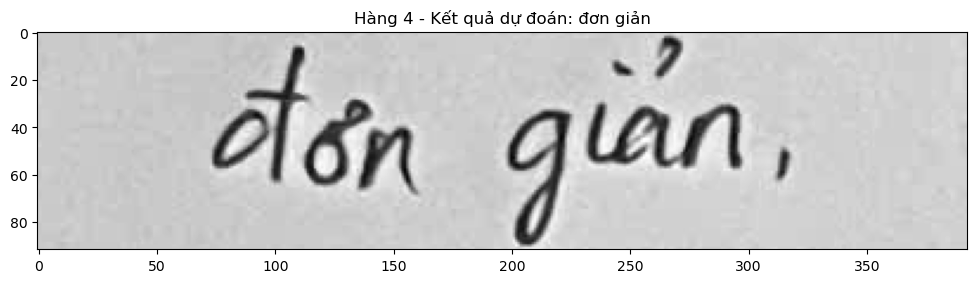

1/1 [==============================] - 0s 43ms/step
Dòng dự đoán (hàng 5): vối . đầy đi dứm câi cách vối đảy chứt tả " và biaunc . " Lộn-Xận . .


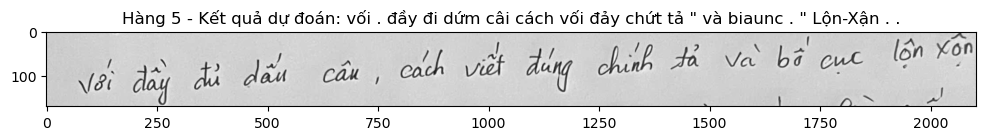

1/1 [==============================] - 0s 43ms/step
Dòng dự đoán (hàng 6): môt v " con . mèo rằm yên tiên mớt . nhị hùn cống lììn xuổng


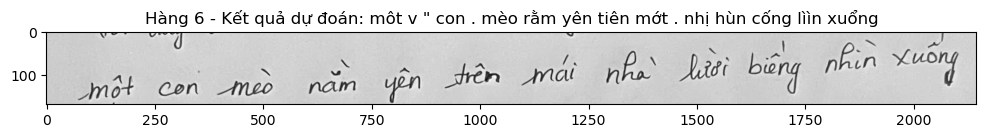

1/1 [==============================] - 0s 44ms/step
Dòng dự đoán (hàng 7): sừng cưn côna-một nhảm tê-eng choi . dôăn-lác-trơ-tăng . " . .


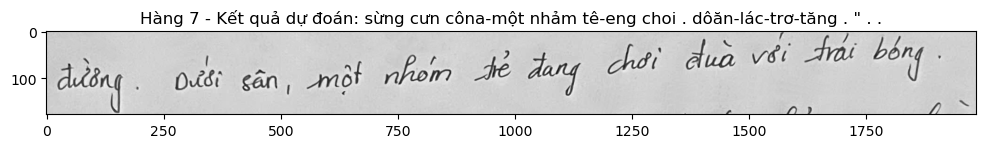

1/1 [==============================] - 0s 44ms/step
Dòng dự đoán (hàng 8): cần-trời hâm may-trong xanh gió thẹ thới qua làm


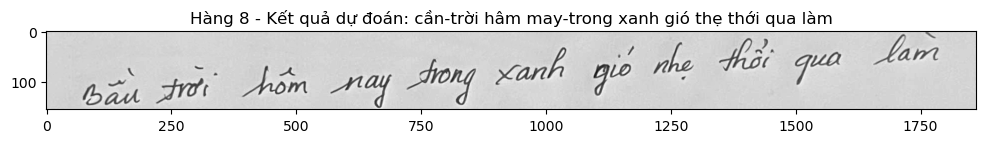

1/1 [==============================] - 0s 44ms/step
Dòng dự đoán (hàng 9): nhưng chiếc ló cây rung tinh .


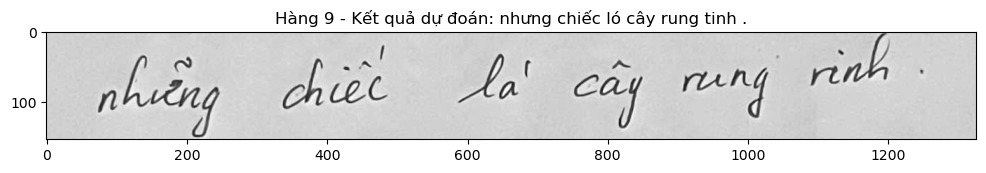

1/1 [==============================] - 0s 44ms/step
Dòng dự đoán (hàng 10): Bàng một con mèo duát tói nồm cạnh con-mèn con-mao


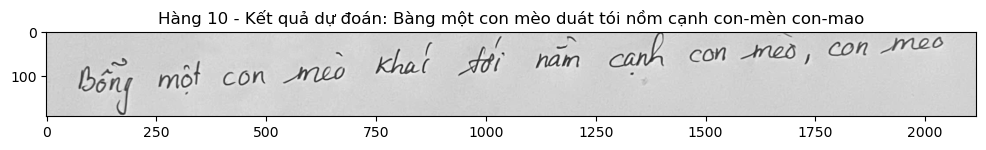

1/1 [==============================] - 0s 45ms/step
Dòng dự đoán (hàng 11): đứng dậy bỏ đi


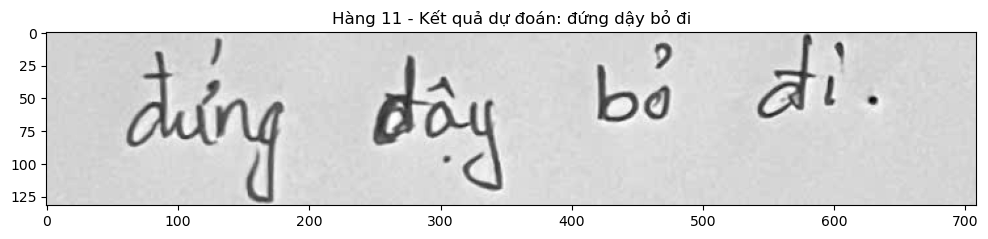

In [90]:

# %% [markdown]
# ### Bước 6: Nhận diện các từ từ các hàng và hiển thị kết quả
def recognize_text(model, word_img, char_list):
    # Tiền xử lý ảnh (nếu cần)
    word_img = process_image(word_img)  # Gọi hàm xử lý ảnh nếu có
    word_img = np.expand_dims(word_img, axis=0)  # Thêm batch dimension cho ảnh

    # Dự đoán
    prediction = model.predict(word_img)
    
    # Giải mã CTC để chuyển từ dạng số sang văn bản
    decoded = K.ctc_decode(prediction, input_length=np.ones(prediction.shape[0]) * prediction.shape[1], greedy=True)[0][0]
    out = K.get_value(decoded)

    # Chuyển kết quả thành chuỗi văn bản
    text = ''.join([char_list[int(p)] for p in out[0] if int(p) != -1])
    
    return text

full_text = ""
rows = sorted(rows, key=lambda r: r[1])  # Sắp xếp lại các hàng theo thứ tự từ trên xuống và đảm bảo không có trùng lặp
words_in_rows = words_in_rows[:len(rows)]  # Đảm bảo số lượng từ phù hợp với số lượng hàng

for row_idx, words in enumerate(words_in_rows):
    row_text = ""
    for (wx, wy, ww, wh, word_img) in words:
        predicted_char = recognize_text(act_model, word_img, char_list)
        row_text += predicted_char + " "
    full_text += row_text.strip() + "\n"
    print(f"Dòng dự đoán (hàng {row_idx + 1}): {row_text.strip()}")
    
    # Hiển thị kết quả của từng hàng và so sánh với ảnh gốc
    if row_idx < len(rows):  # Kiểm tra để tránh lỗi vượt quá chỉ số
        plt.figure(figsize=(12, 4))
        plt.imshow(rows[row_idx][4], cmap='gray')
    plt.title(f'Hàng {row_idx + 1} - Kết quả dự đoán: {row_text.strip()}' )
    plt.show()


In [91]:
# print("kết quả toàn văn bản")
# print("\nĐây là một đoạn văn bản tiếng Việt\nđược tạo ro để kiểm tra khả năng nhận diện chữ cửa mô hình\nNội dung của văn bản này bao gồm các \ncâu đơn giản,\nVới đầy đủ dáu câu, cách viết đúng chính tả và bố cục lộn xận\nMột con mèo nằm yên trên mói nhà lười biếngg nhìn Xuống \nđường. Dưới sân, một nhám trỏ đang chơi đùa với trái bóng. \nBầu trời hôm may-trong xanh, gió nhẹ thổi qua làm\nnhững chiếc lá cây rung tinh.\nBỗng một con mèo khái tới nằm cạnh con mòo. , con mèo\nđứng dậy bỏ đi.")
# print("\n \n \n")
print("kết quả toàn văn bản")
print(full_text)

kết quả toàn văn bản
Dây là một đoạn văn bản tiếng Việt
được tạo ra để Kiểm tra Khỏ năng nhận diện chữ
cưa mô "í hình : Nộr-dung cưa văn bản này bao gồm các câu
đơn giản
vối . đầy đi dứm câi cách vối đảy chứt tả " và biaunc . " Lộn-Xận . .
môt v " con . mèo rằm yên tiên mớt . nhị hùn cống lììn xuổng
sừng cưn côna-một nhảm tê-eng choi . dôăn-lác-trơ-tăng . " . .
cần-trời hâm may-trong xanh gió thẹ thới qua làm
nhưng chiếc ló cây rung tinh .
Bàng một con mèo duát tói nồm cạnh con-mèn con-mao
đứng dậy bỏ đi

